In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, CategoricalNB
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder


In [2]:
data = pd.read_csv('large_movies_data_with_details.csv')
print(data.columns)
data.head()

Index(['adult', 'backdrop_path', 'genre_ids', 'id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'release_date', 'title', 'video', 'vote_average', 'vote_count',
       'belongs_to_collection', 'budget', 'genres', 'homepage', 'imdb_id',
       'origin_country', 'production_companies', 'production_countries',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline'],
      dtype='object')


,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,...,homepage,imdb_id,origin_country,production_companies,production_countries,revenue,runtime,spoken_languages,status,tagline
0,False,/zxxIzU6XjzTQKS9pPeLmYTDTFL1.jpg,"[35, 80]",209189,en,Life of Crime,Two common criminals get more than they bargai...,5.395,/apO5xGmcEHpdIBc3Zreax7MXl2m.jpg,2013-09-14,...,NaN,tt1663207,['US'],"[{'id': 23700, 'logo_path': None, 'name': 'Abb...","[{'iso_3166_1': 'US', 'name': 'United States o...",265452,94,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Right target. Wrong woman.
1,False,/69EFgWWPFWbRNHmQgYdSnyJ94Ge.jpg,"[28, 12, 878]",49521,en,Man of Steel,A young boy learns that he has extraordinary p...,4.600,/dksTL9NXc3GqPBRHYHcy1aIwjS.jpg,2013-06-12,...,https://www.warnerbros.com/movies/man-steel,tt0770828,['US'],"[{'id': 9993, 'logo_path': '/2Tc1P3Ac8M479naPp...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",668045518,143,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,You will believe that a man can fly.
2,False,/63y4XSVTZ7mRzAzkqwi3o0ajDZZ.jpg,"[80, 18, 35]",106646,en,The Wolf of Wall Street,A New York stockbroker refuses to cooperate in...,4.579,/kW9LmvYHAaS9iA0tHmZVq8hQYoq.jpg,2013-12-25,...,http://www.thewolfofwallstreet.com/,tt0993846,['US'],"[{'id': 19177, 'logo_path': None, 'name': 'Red...","[{'iso_3166_1': 'US', 'name': 'United States o...",392000000,180,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Earn. Spend. Party.
3,False,/AgWnDRoGbbE6oXJWZpQVQWWzaUa.jpg,[35],209244,en,Are You Here,"When Steve Dallas, a womanizing local weatherm...",5.338,/v83MAkGH8jF8uNhJhKgADqw3Xup.jpg,2013-09-07,...,NaN,tt1545754,['US'],"[{'id': 10161, 'logo_path': None, 'name': 'Gil...","[{'iso_3166_1': 'US', 'name': 'United States o...",0,114,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Friendship... there's nothing in it for anybody.
4,False,/xEY0MV2jSQBz9iOJfCFvLTiPGMA.jpg,"[53, 80]",75656,en,Now You See Me,An FBI agent and an Interpol detective track a...,4.280,/tWsNYbrqy1p1w6K9zRk0mSchztT.jpg,2013-05-29,...,NaN,tt1670345,['US'],"[{'id': 491, 'logo_path': '/5LvDUt3KmvRnXQ4Nrd...","[{'iso_3166_1': 'US', 'name': 'United States o...",351723989,116,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,"The closer you look, the less you’ll see."


In [3]:
print(f"Rows: {data.shape[0]}, Columns: {data.shape[1]}")

Rows: 1100, Columns: 27


In [4]:
# Convert the target 'adult' to integer if it was used before
# But now we are creating a new target variable 'hit'
data['revenue'] = pd.to_numeric(data['revenue'], errors='coerce')

# Create the new target variable 'hit' based on revenue median
median_revenue = data['revenue'].median()
data['hit'] = (data['revenue'] > median_revenue).astype(int)

# Remove duplicates
data = data.drop_duplicates()

# Check for and handle missing values in the relevant columns
features = ['vote_count', 'budget', 'runtime']
target = 'hit'
data = data.dropna(subset=features + [target])

# Ensure numeric types for features
for col in features:
    data[col] = pd.to_numeric(data[col], errors='coerce')
    # Remove rows where conversion fails (if any)
    data = data.dropna(subset=[col])
    
# Optional: Check for negative values (shouldn't occur for these features)
for col in features:
    if (data[col] < 0).any():
        print(f"Warning: Negative values found in {col}.")
        # Optionally, remove or fix these entries
        data = data[data[col] >= 0]

# Proceed with your Naïve Bayes pipeline...
print("Cleaned Data Preview:")
print(data[features + [target]].head())

Cleaned Data Preview:
   vote_count     budget  runtime  hit
0         391   12000000       94    0
1       15309  225000000      143    1
2       24396  100000000      180    1
3         276          0      114    0
4       15675   75000000      116    1


In [5]:

# the target variable 'hit' based on revenue
median_revenue = data['revenue'].median()
data['hit'] = (data['revenue'] > median_revenue).astype(int)

# Check the distribution of the new target variable
print("Distribution of 'hit':")
print(data['hit'].value_counts())

Distribution of 'hit':
hit
0    540
1    540
Name: count, dtype: int64


In [6]:

# Select features and target
features = ['vote_count', 'budget', 'runtime']
target = 'hit'

# Drop rows with missing values in the selected columns
data = data.dropna(subset=features + [target])
data.head()


,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,...,imdb_id,origin_country,production_companies,production_countries,revenue,runtime,spoken_languages,status,tagline,hit
0,False,/zxxIzU6XjzTQKS9pPeLmYTDTFL1.jpg,"[35, 80]",209189,en,Life of Crime,Two common criminals get more than they bargai...,5.395,/apO5xGmcEHpdIBc3Zreax7MXl2m.jpg,2013-09-14,...,tt1663207,['US'],"[{'id': 23700, 'logo_path': None, 'name': 'Abb...","[{'iso_3166_1': 'US', 'name': 'United States o...",265452,94,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Right target. Wrong woman.,0
1,False,/69EFgWWPFWbRNHmQgYdSnyJ94Ge.jpg,"[28, 12, 878]",49521,en,Man of Steel,A young boy learns that he has extraordinary p...,4.600,/dksTL9NXc3GqPBRHYHcy1aIwjS.jpg,2013-06-12,...,tt0770828,['US'],"[{'id': 9993, 'logo_path': '/2Tc1P3Ac8M479naPp...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",668045518,143,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,You will believe that a man can fly.,1
2,False,/63y4XSVTZ7mRzAzkqwi3o0ajDZZ.jpg,"[80, 18, 35]",106646,en,The Wolf of Wall Street,A New York stockbroker refuses to cooperate in...,4.579,/kW9LmvYHAaS9iA0tHmZVq8hQYoq.jpg,2013-12-25,...,tt0993846,['US'],"[{'id': 19177, 'logo_path': None, 'name': 'Red...","[{'iso_3166_1': 'US', 'name': 'United States o...",392000000,180,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Earn. Spend. Party.,1
3,False,/AgWnDRoGbbE6oXJWZpQVQWWzaUa.jpg,[35],209244,en,Are You Here,"When Steve Dallas, a womanizing local weatherm...",5.338,/v83MAkGH8jF8uNhJhKgADqw3Xup.jpg,2013-09-07,...,tt1545754,['US'],"[{'id': 10161, 'logo_path': None, 'name': 'Gil...","[{'iso_3166_1': 'US', 'name': 'United States o...",0,114,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Friendship... there's nothing in it for anybody.,0
4,False,/xEY0MV2jSQBz9iOJfCFvLTiPGMA.jpg,"[53, 80]",75656,en,Now You See Me,An FBI agent and an Interpol detective track a...,4.280,/tWsNYbrqy1p1w6K9zRk0mSchztT.jpg,2013-05-29,...,tt1670345,['US'],"[{'id': 491, 'logo_path': '/5LvDUt3KmvRnXQ4Nrd...","[{'iso_3166_1': 'US', 'name': 'United States o...",351723989,116,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,"The closer you look, the less you’ll see.",1


In [7]:
print(f"Rows: {data.shape[0]}, Columns: {data.shape[1]}")

Rows: 1080, Columns: 28


In [8]:
# Prepare Data for Multinomial NB
# For MultinomialNB, use raw counts (ensure non-negative integers)
data_mult = data.copy()
print("First 5 rows of data_mult dataframe:")
print(data_mult.head())

First 5 rows of data_mult dataframe:
   adult                     backdrop_path      genre_ids      id  \
0  False  /zxxIzU6XjzTQKS9pPeLmYTDTFL1.jpg       [35, 80]  209189   
1  False  /69EFgWWPFWbRNHmQgYdSnyJ94Ge.jpg  [28, 12, 878]   49521   
2  False  /63y4XSVTZ7mRzAzkqwi3o0ajDZZ.jpg   [80, 18, 35]  106646   
3  False  /AgWnDRoGbbE6oXJWZpQVQWWzaUa.jpg           [35]  209244   
4  False  /xEY0MV2jSQBz9iOJfCFvLTiPGMA.jpg       [53, 80]   75656   

  original_language           original_title  \
0                en            Life of Crime   
1                en             Man of Steel   
2                en  The Wolf of Wall Street   
3                en             Are You Here   
4                en           Now You See Me   

                                            overview  popularity  \
0  Two common criminals get more than they bargai...       5.395   
1  A young boy learns that he has extraordinary p...       4.600   
2  A New York stockbroker refuses to cooperate in...   

In [9]:
# Prepare Data for Bernoulli NB
# Binarize features using the median as threshold
data_bern = data.copy()
for col in features:
    median_val = data_bern[col].median()
    print(f"Median value for {col}: {median_val}")
    data_bern[col] = (data_bern[col] > median_val).astype(int)
    print(f"First 5 values for {col} after binarization:")
    print(data_bern[col].head())


Median value for vote_count: 2490.5
First 5 values for vote_count after binarization:
0    0
1    1
2    1
3    0
4    1
Name: vote_count, dtype: int64
Median value for budget: 19650000.0
First 5 values for budget after binarization:
0    0
1    1
2    1
3    0
4    1
Name: budget, dtype: int64
Median value for runtime: 109.0
First 5 values for runtime after binarization:
0    0
1    1
2    1
3    1
4    1
Name: runtime, dtype: int64


In [10]:
# Prepare Data for Categorical NB
# Convert numeric features into categorical bins: 'low', 'medium', 'high'
def bin_feature(series):
    return pd.cut(series, bins=3, labels=['low', 'medium', 'high'])

data_cat = data.copy()
for col in features:
    data_cat[col] = bin_feature(data_cat[col])
    print(f"\nCategorization for '{col}':")
    print(data_cat[col].value_counts())
    print(f"First 5 categorized values for '{col}':")
    print(data_cat[col].head())



Categorization for 'vote_count':
vote_count
low       994
medium     82
high        4
Name: count, dtype: int64
First 5 categorized values for 'vote_count':
0       low
1    medium
2    medium
3       low
4    medium
Name: vote_count, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']

Categorization for 'budget':
budget
low       970
medium    105
high        5
Name: count, dtype: int64
First 5 categorized values for 'budget':
0       low
1    medium
2       low
3       low
4       low
Name: budget, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']

Categorization for 'runtime':
runtime
medium    1007
low         52
high        21
Name: count, dtype: int64
First 5 categorized values for 'runtime':
0    medium
1    medium
2      high
3    medium
4    medium
Name: runtime, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']


In [11]:
# Split Data into Training and Testing Sets (with stratification)
def split_dataset(df):
    X = df[features]
    y = df[target]
    return train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train_mult, X_test_mult, y_train, y_test = split_dataset(data_mult)
X_train_bern, X_test_bern, _, _ = split_dataset(data_bern)
X_train_cat, X_test_cat, _, _ = split_dataset(data_cat)

# Print training and testing set previews for MultinomialNB
print("\nMultinomial NB - Training Set Preview:")
print(X_train_mult.head())
print("\nMultinomial NB - Testing Set Preview:")
print(X_test_mult.head())

# Train and Evaluate Models
results = {}


Multinomial NB - Training Set Preview:
     vote_count     budget  runtime
522        7904   62000000      143
614        6932  150000000      105
302       22975  250000000      147
251        1846     630019       32
440        7449   58000000      104

Multinomial NB - Testing Set Preview:
      vote_count    budget  runtime
354         3707  73000000       97
1053         132         0       96
687         1160         0       92
989         3388         0      103
694          318   6837995       90


In [12]:
# 1. Multinomial NB
model_mult = MultinomialNB()
model_mult.fit(X_train_mult, y_train)
y_pred_mult = model_mult.predict(X_test_mult)
cm_mult = confusion_matrix(y_test, y_pred_mult)
acc_mult = accuracy_score(y_test, y_pred_mult)
results['MultinomialNB'] = {'confusion_matrix': cm_mult, 'accuracy': acc_mult}
print("Multinomial NB Confusion Matrix:")
print(cm_mult)
print("Multinomial NB Accuracy:", acc_mult)

Multinomial NB Confusion Matrix:
[[89 19]
 [46 62]]
Multinomial NB Accuracy: 0.6990740740740741


In [13]:
# 2. Bernoulli NB
model_bern = BernoulliNB()
model_bern.fit(X_train_bern, y_train)
y_pred_bern = model_bern.predict(X_test_bern)
cm_bern = confusion_matrix(y_test, y_pred_bern)
acc_bern = accuracy_score(y_test, y_pred_bern)
results['BernoulliNB'] = {'confusion_matrix': cm_bern, 'accuracy': acc_bern}

In [14]:
# 3. Categorical NB
# Encode categorical features to integer values
encoder = OrdinalEncoder()
X_train_cat_enc = encoder.fit_transform(X_train_cat)
X_test_cat_enc = encoder.transform(X_test_cat)
model_cat = CategoricalNB()
model_cat.fit(X_train_cat_enc, y_train)
y_pred_cat = model_cat.predict(X_test_cat_enc)
cm_cat = confusion_matrix(y_test, y_pred_cat)
acc_cat = accuracy_score(y_test, y_pred_cat)
results['CategoricalNB'] = {'confusion_matrix': cm_cat, 'accuracy': acc_cat}


In [15]:
# Print Results
print("\nModel Results:")
for model_name, res in results.items():
    print(f"\n{model_name}:")
    print("Confusion Matrix:")
    print(res['confusion_matrix'])
    print("Accuracy:", res['accuracy'])


Model Results:

MultinomialNB:
Confusion Matrix:
[[89 19]
 [46 62]]
Accuracy: 0.6990740740740741

BernoulliNB:
Confusion Matrix:
[[96 12]
 [22 86]]
Accuracy: 0.8425925925925926

CategoricalNB:
Confusion Matrix:
[[107   1]
 [ 74  34]]
Accuracy: 0.6527777777777778


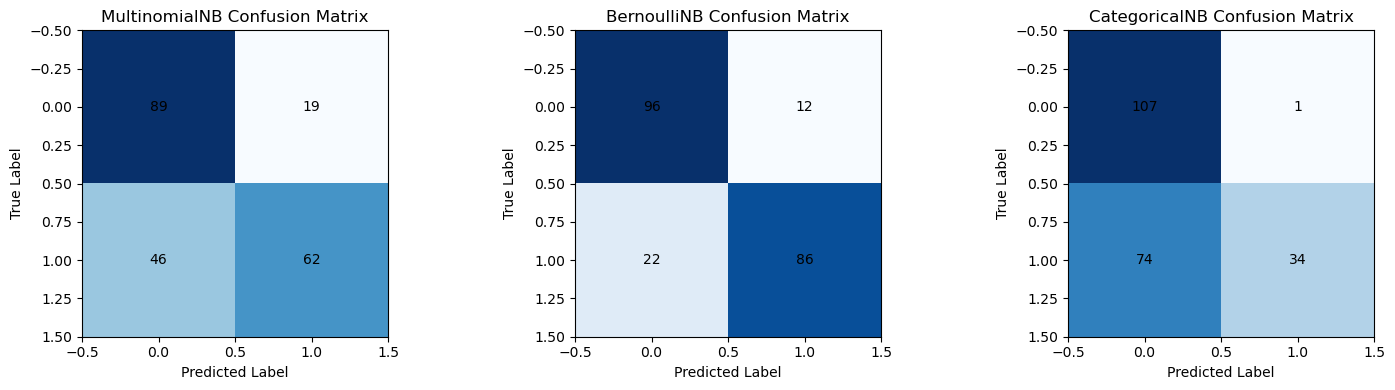

In [16]:
# Visualize Confusion Matrices
# -----------------------------
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for ax, (model_name, res) in zip(axes, results.items()):
    im = ax.imshow(res['confusion_matrix'], cmap='Blues')
    ax.set_title(f"{model_name} Confusion Matrix")
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")
    # Annotate the confusion matrix cells
    for i in range(res['confusion_matrix'].shape[0]):
        for j in range(res['confusion_matrix'].shape[1]):
            ax.text(j, i, res['confusion_matrix'][i, j], ha='center', va='center', color='black')
plt.tight_layout()
plt.show()